In [202]:
import csv
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def GSPA_payoff(values, bids, k, possible_bids, w, bidder):
    pay_arr = np.zeros((k))
    for i in range(k):
            bids[bidder] = possible_bids[i]
            # bids.argsort()[bidder] is the index of this current bidder when sorted into accsending order
            #index = bids.argsort()[bidder]
            index = np.where(bids.argsort(kind = "stable")==bidder)[0][0]
            #larger the better w, and w is also in accending order
            if not index == 0:
                pay_arr[i] = w[index] * (values[bidder] - bids.argsort()[index - 1])
            else:
                pay_arr[i] = w[index] * values[bidder]
    return pay_arr

def exp_w(k, learn_rate, N, payoffs, opt):
    #main simulator
    #Returns the regret
    utility = 0
    #keep track of current total payoffs for all actions
    prefix_total_payoffs = np.array([0 for i in range(k)], dtype='float')
    for round in range(N):
        #select a randomized action with EW algorithm
        action_selected = select_action(prefix_total_payoffs, learn_rate, k)
        #update total payoff for each action
        prefix_total_payoffs += payoffs[round]
        #accumulate the regret
        utility += payoffs[round][action_selected]
    return (opt - utility)/N

def select_action(prefix_total_payoffs, learn_rate, k):
    action_prob = np.array([0 for i in range(k)], dtype='float')
    if sum(prefix_total_payoffs) != 0:
        for action in range(k):
            #EW probability formula
            action_prob[action] = math.pow(1+learn_rate, prefix_total_payoffs[action])/sum(prefix_total_payoffs)
        #do weighted randomization on EW probability
        action_selected = random.choices(range(k), weights=action_prob, k=1)[0]
    else:
        #randomly select at first
        action_selected = (int)(random.uniform(0,k))
    return action_selected


def select_action_explore(prefix_total_payoffs, learn_rate, k):
    explore_rate = 0.1
    action_prob = np.array([0 for i in range(k)], dtype='float')
    if sum(prefix_total_payoffs) != 0 and random.random() > explore_rate:
        for action in range(k):
            #EW probability formula
            action_prob[action] = math.pow(1+learn_rate, prefix_total_payoffs[action])/sum(prefix_total_payoffs)
        #do weighted randomization on EW probability
        action_selected = random.choices(range(k), weights=action_prob, k=1)[0]
    else:
        #randomly select at first
        action_selected = (int)(random.uniform(0,k))
    return action_selected

possible_bids = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
k = len(possible_bids)
#set the winning probability, for m players
w = np.array([0.5, 0.8, 0.9])
m = len(w)
#Assign values to players
values = [0.3,0.5, 0.6]
bids = np.array([0.4, 0.2, 0.3])
print(GSPA_payoff(values, bids, k, possible_bids, w, 0))


[ 0.15  0.15 -0.56 -1.53 -1.53]


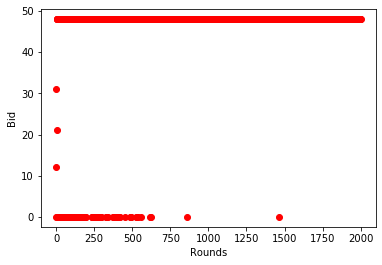

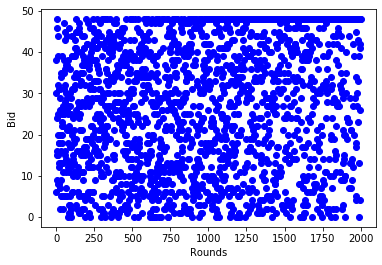

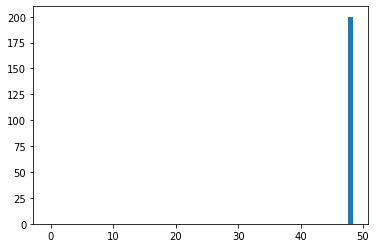

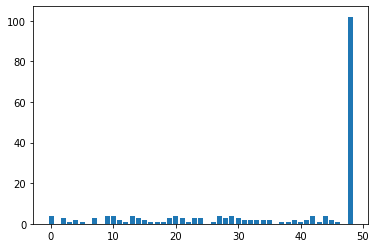

range(0, 49) [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 200.]
range(0, 49) [  4.   0.   3.   1.   2.   1.   0.   3.   0.   4.   4.   2.   1.   4.
   3.   2.   1.   1.   1.   3.   4.   3.   1.   3.   3.   0.   1.   4.
   3.   4.   3.   2.   2.   2.   2.   2.   0.   1.   1.   2.   1.   2.
   4.   1.   4.   2.   1.   0. 102.]
2.0


In [251]:
def test4():
    #Let us have k possible bids to pick from 
    possible_bids = np.array(range(1,50))/100
    k = len(possible_bids)
    #set the winning probability, for m players
    w = np.array([0.1, 0.15])
    m = len(w)
    #Assign values to players
    values = [0.5,0.1]
    #Set the number of rounds.
    n = 2000
    #Let us set the learning rates
    l_r = [0.1,0.5]
    #keep track of current total payoffs for all actions and for all players
    prefix_total_payoffs = np.zeros((m,k), dtype= 'float')
    #for plotting
    bids_track = np.zeros((m, n))
    utility = np.zeros((m))
    #Let us start the process. 

    for i in range(n):
        bids = np.zeros(m)
        for j in range(m):
            action_selected = select_action(prefix_total_payoffs[j],l_r[j],k)
            bids_track[j][i] = action_selected
            bids[j] = possible_bids[action_selected]
        for j in range(m):
            pays = GSPA_payoff(values, bids, k, possible_bids, w, j)
            prefix_total_payoffs[j] += pays
            utility[j] += pays[(int)(bids_track[j][i])]

    plt.scatter(range(n), bids_track[0], color = 'r')
    plt.xlabel("Rounds")
    plt.ylabel("Bid")
    plt.show()
    plt.scatter(range(n), bids_track[1], color = 'b')
    plt.xlabel("Rounds")
    plt.ylabel("Bid")
    plt.show()
    
    nash = np.zeros((m, k))
    for j in range(m):
        for i in range(max(0, n - 200), n):
            nash[j][(int)(bids_track[j][i])] += 1
    plt.bar(range(k),nash[0])
    plt.show()
    plt.bar(range(k),nash[1])
    plt.show()
    print(range(k),nash[0])
    print(range(k),nash[1])
    print(np.sum(nash[1])/100)
test4()


In [89]:
x = np.array([1,3,6,2,3])
print(x.argsort(kind = "stable"))
print(np.where(x.argsort(kind = "stable")==2)[0][0])

[0 3 1 4 2]
4


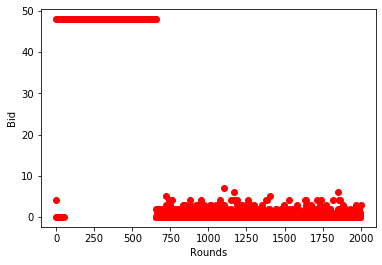

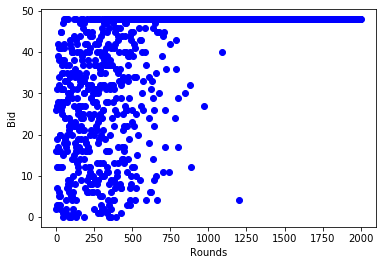

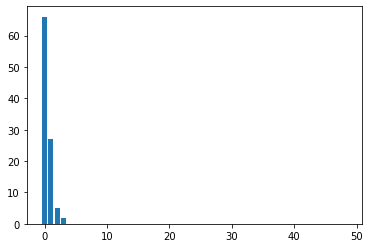

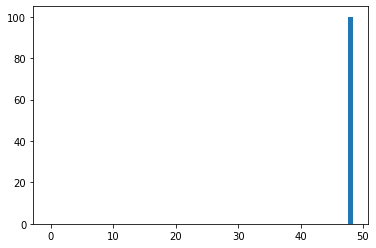

range(0, 49) [66. 27.  5.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
range(0, 49) [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 100.]


In [242]:
def test5():
    #Let us have k possible bids to pick from 
    possible_bids = np.array(range(1,50))/100
    k = len(possible_bids)
    #set the winning probability, for m players
    w = np.array([0.2, 0.4])
    m = len(w)
    #Assign values to players
    values = [0.5,0.1]
    #Set the number of rounds.
    n = 2000
    #Let us set the learning rates
    l_r = [0.5,0.5]
    #keep track of current total payoffs for all actions and for all players
    prefix_total_payoffs = np.zeros((m,k), dtype= 'float')
    #for plotting
    bids_track = np.zeros((m, n))
    utility = np.zeros((m))
    #Let us start the process. 

    for i in range(n):
        bids = np.zeros(m)
        for j in range(m):
            action_selected = select_action(prefix_total_payoffs[j],l_r[j],k)
            bids_track[j][i] = action_selected
            bids[j] = possible_bids[action_selected]
        for j in range(m):
            pays = GSPA_payoff(values, bids, k, possible_bids, w, j)
            prefix_total_payoffs[j] += pays
            utility[j] += pays[(int)(bids_track[j][i])]

    plt.scatter(range(n), bids_track[0], color = 'r')
    plt.xlabel("Rounds")
    plt.ylabel("Bid")
    plt.show()
    plt.scatter(range(n), bids_track[1], color = 'b')
    plt.xlabel("Rounds")
    plt.ylabel("Bid")
    plt.show()
    
    nash = np.zeros((m, k))
    for j in range(m):
        for i in range(max(0, n - 100), n):
            nash[j][(int)(bids_track[j][i])] += 1
    plt.bar(range(k),nash[0])
    plt.show()
    plt.bar(range(k),nash[1])
    plt.show()
    print(range(k),nash[0])
    print(range(k),nash[1])
test5()